In [1]:
import cartopy.crs as ccrs
import healpix as hp
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import easygems.healpix as egh
import easygems.remap as egr

/home/users/mmuetz/miniforge3/envs/hackathon_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
dsT = xr.open_dataset('/gws/nopw/j04/hrcm/mmuetz/DYAMOND3_example_data/healpix/air_temperature/hpz10/glm.n2560_RAL3p3.apverd_20200120T00.air_temperature.hpz10.nc')


/tmp/ipykernel_673/1905326407.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dsT = xr.open_dataset('/gws/nopw/j04/hrcm/mmuetz/DYAMOND3_example_data/healpix/air_temperature/hpz10/glm.n2560_RAL3p3.apverd_20200120T00.air_temperature.hpz10.nc')


In [3]:
dsT

<xarray.Dataset> Size: 13GB
Dimensions:                  (time: 5, pressure: 25, cell: 12582912)
Coordinates:
  * time                     (time) datetime64[ns] 40B 2020-01-20 ... 2020-01...
  * pressure                 (pressure) float32 100B 1.0 5.0 ... 975.0 1e+03
    forecast_period          (time) timedelta64[ns] 40B ...
    forecast_reference_time  datetime64[ns] 8B ...
  * cell                     (cell) int64 101MB 0 1 2 ... 12582910 12582911
Data variables:
    air_temperature          (time, pressure, cell) float64 13GB ...
Attributes:
    standard_name:    air_temperature
    units:            K
    um_stash_source:  m01s16i203
    source:           Data from Met Office Unified Model
    um_version:       13.5
    grid_mapping:     healpix_nested
    healpix_zoom:     10

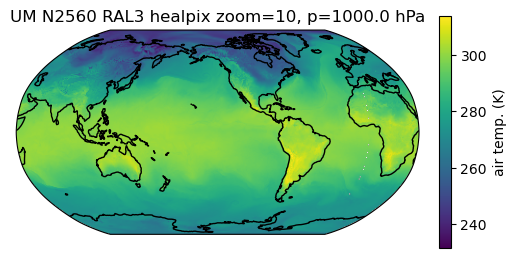

In [10]:
data = dsT.air_temperature.isel(time=0, pressure=-1)
pressure = data.pressure.values.item()
projection = ccrs.Robinson(central_longitude=-135.5808361)
fig, ax0 = plt.subplots(1, 1, figsize=(5, 2.5), subplot_kw={'projection': projection}, layout='constrained')
zoom = 10
ax0.set_title(f'UM N2560 RAL3 healpix zoom={zoom}, p={pressure} hPa')
ax0.set_global()
im = egh.healpix_show(dsT.air_temperature.isel(time=0, pressure=-1).values, ax=ax0);
plt.colorbar(im, label='air temp. (K)')
ax0.coastlines();